# Outliers

In [2]:
# - These are the extreme values
# - We have to treat the outliers

In [3]:
# - Either we can remove the rows that have outliers.
# - We can cap the values to remove the outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# before treating outliers we have to tret null values or missing values

In [4]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

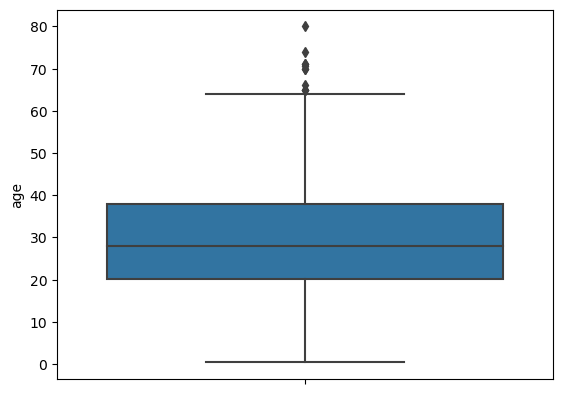

In [8]:
sns.boxplot(y='age',data=data)

plt.show()

In [9]:
# iqr
# q3
# q1

In [14]:
q1=data.age.quantile(0.25)
q3=data.age.quantile(0.75)

iqr=q3-q1

upper=q3+1.5*iqr
lower=q1-1.5*iqr

print('Q1- ',q1)
print('Q3- ',q3)
print('IQR- ',iqr)
print('Upper- ',upper)
print('Lower- ',lower)

Q1-  20.125
Q3-  38.0
IQR-  17.875
Upper-  64.8125
Lower-  -6.6875


In [17]:
(data.age>upper).sum()

11

In [19]:
(data.age<lower).sum()

0

In [48]:
ind=data[data.age>upper].index

In [52]:
list(ind)

[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [22]:
data.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [27]:
20.125-(1.5*(38-20.125))
# here when we see above we got the min value as 0.420000 but when we use calculation we got -6.6875 the difference is because of this whisker value 1.5
# this 1.5 is variable means some people can take 1.2 some cases 2 is used depending upon how many data points we are losing, with theexperiments if we 
# take 1.5 times the chances of losing data is very minimum so the standard whisker value is 1.5

-6.6875

In [26]:
q1

20.125

In [24]:
iqr

17.875

In [25]:
38-20.125

17.875

In [29]:
q1-iqr

2.25

In [30]:
q3+iqr

55.875

# Capping

In [31]:
# - Any value that is greater than the upper bound should be converted into upper bound
# - Any value that is less than the lower bound should be converted to lower bound

In [32]:
# data.age.clip(lower,upper)

In [34]:
data['Age_Cap']=data.age.clip(lower,upper)

In [37]:
data[['age','Age_Cap']].describe()

,age,Age_Cap
count,714.000000,714.000000
mean,29.699118,29.622700
std,14.526497,14.316665
min,0.420000,0.420000
25%,20.125000,20.125000
50%,28.000000,28.000000
75%,38.000000,38.000000
max,80.000000,64.812500


In [61]:
data.iloc[list(ind)][['age','Age_Cap']]
# here values greater than upper boundary i.e., 64.8125 are converted into 64.8125 

,age,Age_Cap
33,66.0,64.8125
54,65.0,64.8125
96,71.0,64.8125
116,70.5,64.8125
280,65.0,64.8125
456,65.0,64.8125
493,71.0,64.8125
630,80.0,64.8125
672,70.0,64.8125
745,70.0,64.8125


In [62]:
# clip(lower_limit,upper_limit)

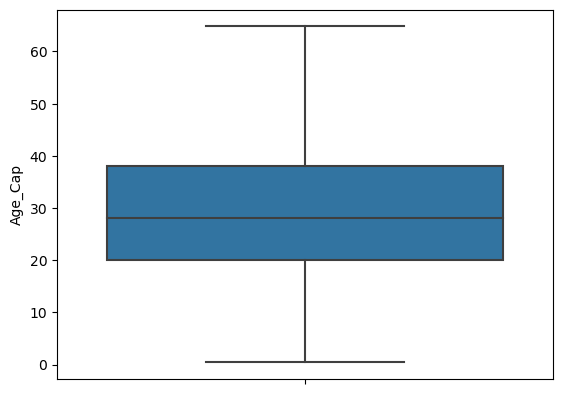

In [64]:
sns.boxplot(y='Age_Cap',data=data)

plt.show()

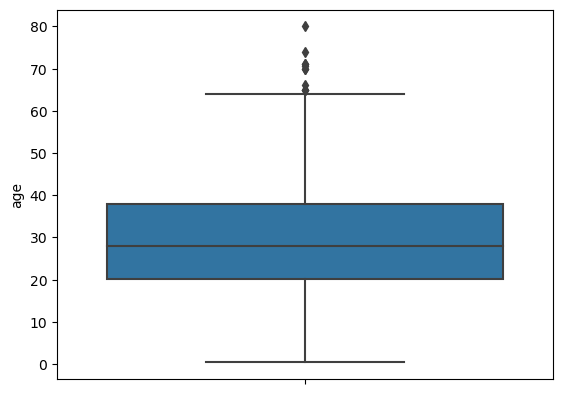

In [66]:
sns.boxplot(y='age',data=data)
plt.show()

In [69]:
data[data.age<lower]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Cap


In [70]:
data.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

<Axes: ylabel='fare'>

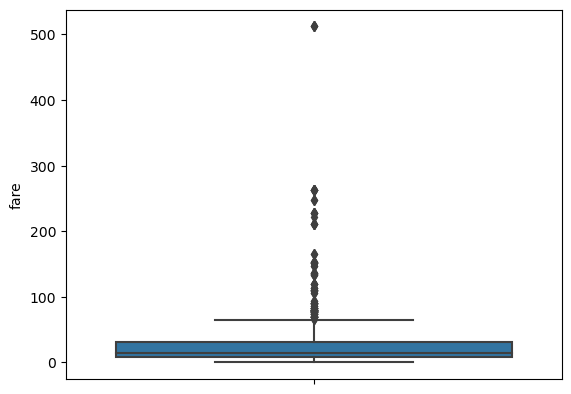

In [71]:
sns.boxplot(y='fare',data=data)
# if we have lot of data points as outliers then we have to change the technique becausewe cannot change lot of data points to upper/lower boundary

# We can also use percentile method

In [97]:
# We cap the values between 1st and 99th percentile -> this method is also called as blanket capping method
# We can cap the values between 5th and the 95th percentile values as well

In [ ]:
# when we are using blanket capping method we don't need to plot the data

In [77]:
lower=data.age.quantile(0.01)
lower
# here we convert outliers to 1.0 which is lower than the 1.0 

1.0

In [78]:
upper=data.age.quantile(0.99)
upper
# we conver the outlier to 65.87 which is upper than 65.87


65.87

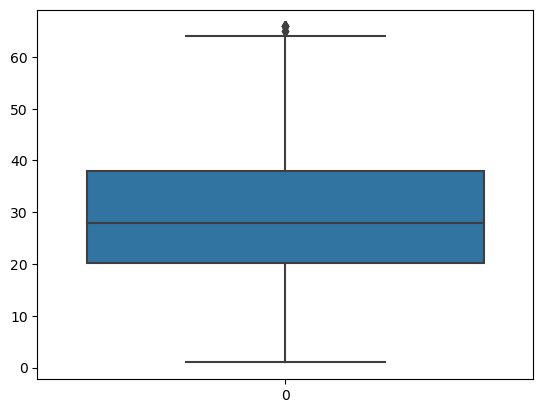

In [81]:
sns.boxplot(data.age.clip(lower,upper))
plt.show()

# We can check the outliers through visual represenstation as well

In [82]:
# - We use the scatterplot

In [84]:
# age

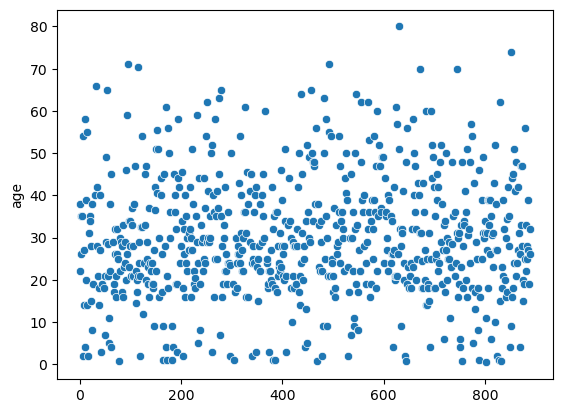

In [88]:
sns.scatterplot(y=data.age,x=data.age.index)

plt.show()

In [90]:
data.age.index

RangeIndex(start=0, stop=891, step=1)

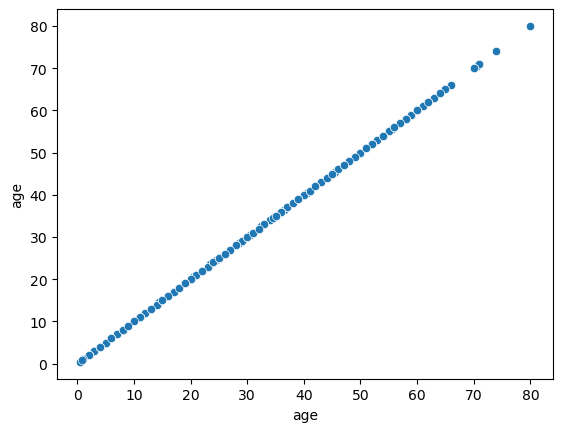

In [92]:
sns.scatterplot(x=data.age,y=data.age)

plt.show()

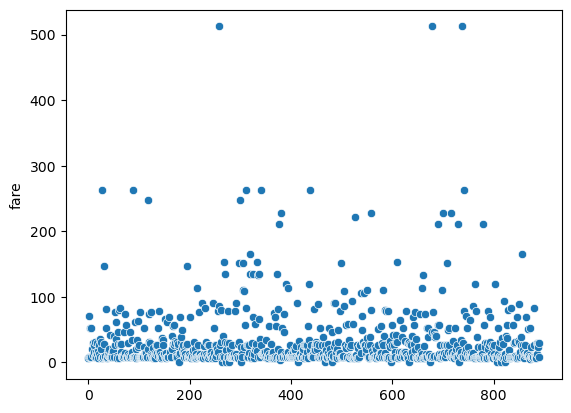

In [94]:
sns.scatterplot(x=data.fare.index,y=data.fare)

plt.show()

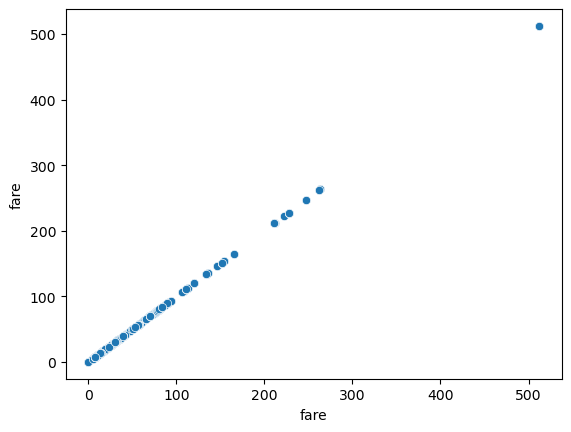

In [96]:
sns.scatterplot(x=data.fare,y=data.fare)

plt.show()